In [2]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Airbnb_Price_Analysis\data\Processed\NYC-Airbnb-2023-Cleaned.csv')

#### Top five records of data:

In [113]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21 00:00:00,0.30,3,314,1
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02 00:00:00,0.30,2,365,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21 00:00:00,0.72,1,0,0
3,5586,Rooftop Deck/City Views. Great Apt,8526,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295,4,45,2022-10-03 00:00:00,0.27,1,1,4
4,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65,30,1,2022-06-05 00:00:00,0.11,2,204,1


### Summary:

In [114]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.619200e+04,3.619200e+04,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000
mean,2.170637e+17,1.476535e+08,40.727963,-73.940966,137.546447,16.727398,18.759726,0.995649,20.587063,134.840379,6.179377
std,3.314020e+17,1.589560e+08,0.058928,0.057003,86.330830,13.666891,31.938530,0.977313,74.204200,142.049766,11.519366
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.934784e+07,1.638471e+07,40.686740,-73.978630,72.000000,2.000000,1.000000,0.190000,1.000000,0.000000,0.000000
50%,4.275736e+07,7.155587e+07,40.722405,-73.950120,116.000000,28.000000,5.000000,0.930000,1.000000,78.000000,0.000000
75%,6.231379e+17,2.590690e+08,40.763272,-73.921430,180.000000,30.000000,21.000000,1.168988,4.000000,281.000000,6.000000
max,8.402289e+17,5.038729e+08,40.911380,-73.710870,573.000000,58.000000,175.000000,5.000000,526.000000,365.000000,88.000000


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36192 non-null  int64  
 1   name                            36192 non-null  object 
 2   host_id                         36192 non-null  int64  
 3   host_name                       36192 non-null  object 
 4   neighbourhood_group             36192 non-null  object 
 5   neighbourhood                   36192 non-null  object 
 6   latitude                        36192 non-null  float64
 7   longitude                       36192 non-null  float64
 8   room_type                       36192 non-null  object 
 9   price                           36192 non-null  int64  
 10  minimum_nights                  36192 non-null  int64  
 11  number_of_reviews               36192 non-null  int64  
 12  last_review                     

## Bivariate Analysis On `Price`:

In [116]:
import plotly.express as px

fig = px.box(x=data['price'], title="Price box plot: ")

fig.update_layout(
    xaxis_title = "Price Column Box Price",
    width=900
)

fig.show()

- There are a few outliers and which will not cause any problem to our analysis.

In [ ]:
neighbourhood_groups = data.groupby(by="neighbourhood_group")['price'].sum().index
total_price = data.groupby(by="neighbourhood_group")['price'].sum().values

fig = px.bar(x=neighbourhood_groups, y=total_price, title=" : ")

fig.update_layout(
    xaxis_title = "Neighbourhood Groups",
    yaxis_title = "Totol Price ",
    width=900

)

fig.show()  

- So we can conclude that `Manhattan` and `Brooklyn` has more price listings as campare to others.

In [118]:
neighbourhood = data.groupby(by='neighbourhood')['price'].sum().sort_values(ascending=False).index
total_Price = data.groupby(by='neighbourhood')['price'].sum().sort_values(ascending=False).values

fig = px.bar(x=neighbourhood[:10], y=total_Price[:10], title="Top 10 neighbourhood which have most price listings: ")

fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_tickmode='linear',
    xaxis_title = "Neighbourhoods",
    yaxis_title = "Total Price",
    width=900
)

fig.show()

In [5]:
neighbourhood = data.groupby(by='neighbourhood')['price'].sum().sort_values(ascending=True).index
total_Price = data.groupby(by='neighbourhood')['price'].sum().sort_values(ascending=True).values

fig = px.bar(x=neighbourhood[:10], y=total_Price[:10], title="Top 10 neighbourhood which have least price listings: ")

fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_tickmode='linear',
    xaxis_title = "Neighbourhoods",
    yaxis_title = "Total Price",
)
fig.show()

In [120]:
fig = px.box(x=data['room_type'], y=data['price'],  title="Box Plot Of Each Room Type: ")
fig.show()

- Similary to `price` variable there are a few outliers in `room_type` column.

In [121]:
room_type = data.groupby(by="room_type")['price'].mean().index
price = data.groupby(by="room_type")['price'].mean().values

fig = px.bar(x=room_type, y=price, title="Price Listings of Each Room Type: ")

fig.update_layout(
    xaxis_title = "All Room Types",
    yaxis_title = "Average Price"
)
fig.show()

- And here we can conclude that, `Hotel Rooms` are expensive, and on the other hand `Shared Room` are the cheapest.

In [122]:
data['availability'] = pd.cut(data['availability_365'], bins=[0, 50, 100, 150, 200, 250, 300, 365], labels=['1-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-365'])

In [123]:
availability = data.groupby(by="availability")['price'].sum().index
availability_price = data.groupby(by="availability")['price'].sum().values

fig = px.bar(x=availability, y=availability_price, title="Total Price Listing By Availability In a Year: ")

fig.update_layout(
    xaxis_title = "Availability In Days",
    yaxis_title = "Total Price"
)

fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5228\3544817047.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5228\3544817047.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- So, if you want to list a property which is available for 300 to 365 days, then you can generate more revenue then others.

In [124]:
data['ratings'] = pd.cut(data['reviews_per_month'], bins=[0, 1, 2, 3, 4, 5], labels=['1', '2', '3', '4', '5'])

In [125]:
ratings = data.groupby(by='ratings')['price'].mean().index
ratings_values = data.groupby(by='ratings')['price'].mean().values

fig = px.bar(x=ratings, y=ratings_values, title="Average Price Based on Ratings: ")

fig.update_layout(
    xaxis_title = "Ratings",
    yaxis_title = "Average Price Of Listings"
)
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5228\122938307.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5228\122938307.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- And `Ratings` are not that big factors for price but you can should maintain your ratings for handsome price.

In [126]:
fig = px.box(x=data['minimum_nights'], title="Minimum Nights Box Plot")
fig.show()

In [127]:
data['minimum_nights_frequency'] = pd.cut(data['minimum_nights'], bins = [1, 10, 20, 30, 40, 50, 60], labels=['1-10', '11-20', '21-30', '31-40', '41-50', '51-60'])

In [128]:
minimum_nights = data.groupby(by='minimum_nights_frequency')['price'].mean().index
average_price = data.groupby(by='minimum_nights_frequency')['price'].mean().values

fig = px.bar(x=minimum_nights, y=average_price, title="Average Price Based On Minimum Nights")

fig.update_layout(
    xaxis_title = "Minimum Nights Ranges",
    yaxis_title = "Average Price"
)

fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5228\4103831305.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5228\4103831305.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- We conclude that, if you want to list any property and which is available for 30 to 40 `minimum nights` than you can charge 10% to 20% extra as compare to other listings.

In [129]:
host_name = data.groupby(by='host_name')['price'].sum().sort_values(ascending=False)[:10].index
Total_price = data.groupby(by='host_name')['price'].sum().sort_values(ascending=False)[:10].values

fig = px.bar(x=host_name, y=Total_price, title="Top 10 host gaints which have maximum price listings on their property:")

fig.update_layout(
    xaxis_title = "Host Names",
    yaxis_title = "Total Price"
)

fig.show()

- So, `Bluegroud` has most listings as compare to other host groups, and that's why we can say that `Bluegroud is Host Gaint`.

## `Location`:

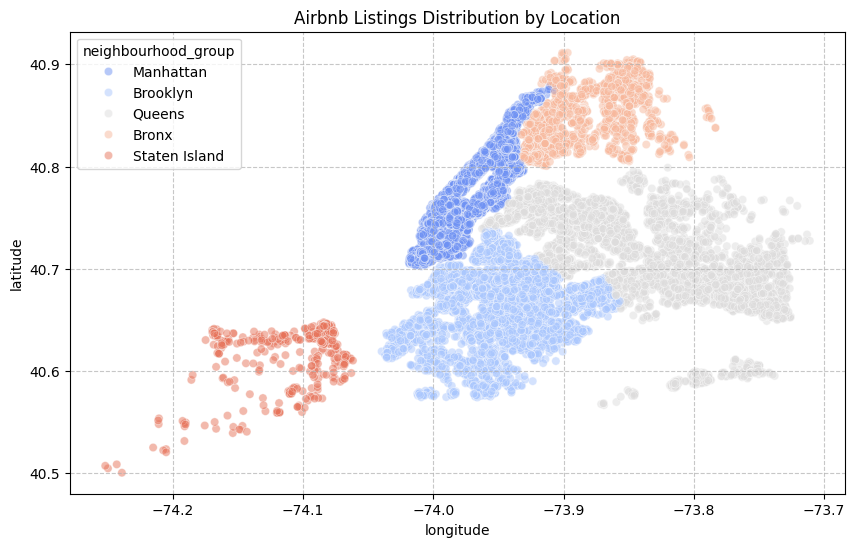

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5, palette='coolwarm')
plt.title('Airbnb Listings Distribution by Location')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [131]:
fig = px.scatter_mapbox(
    data,
    lat='latitude',
    lon='longitude',
    color='price',  
    size_max=5,  
    zoom=10,
    center=dict(lat=data['latitude'].mean(), lon=data['longitude'].mean()),
    mapbox_style="carto-positron",
    title="Heatmap of price based on location"
)

fig.update_layout(
    width=600,
    height=600
)

fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5228\3507587461.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### And the above heat map give the density of price distribution.